# AILAB + LeNER-BR
This jupyter notebook is being develop to integrate the leNER-BR model described in this [article](https://cic.unb.br/~teodecampos/LeNER-Br/luz_etal_propor2018.pdf) with the AILAB text classification pipeline.  

In [1]:
from ailab_ner.lenerbr.ner_model import NERModel
from ailab_ner.lenerbr.config import Config
from ailab_ner.preprocessing import generate_freq_dist_plot, generate_wordcloud
import pandas as pd
from nltk import word_tokenize
from nltk import data
from nltk.tokenize.punkt import PunktSentenceTokenizer
import sys

### Constants

In [41]:
RELATIVE_PATH_TO_FOLDER = "./assets/datasets/"
DATA_FILENAME = "judicial_data"

## Loadinging raw data

In [2]:
excel_filename = RELATIVE_PATH_TO_FOLDER + DATA_FILENAME + ".csv"
df_raw_data = pd.read_csv(excel_filename)

print(df_raw_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 661 entries, 0 to 660
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    661 non-null    int64 
 1   id_documento  661 non-null    int64 
 2   area1         661 non-null    object
 3   tema1         661 non-null    object
 4   subtema1      661 non-null    object
 5   area2         140 non-null    object
 6   tema2         140 non-null    object
 7   subtema2      140 non-null    object
 8   area3         36 non-null     object
 9   tema3         36 non-null     object
 10  subtema3      36 non-null     object
 11  area4         16 non-null     object
 12  tema4         16 non-null     object
 13  subtema4      16 non-null     object
 14  area5         4 non-null      object
 15  tema5         4 non-null      object
 16  subtema5      4 non-null      object
 17  area6         1 non-null      object
 18  tema6         1 non-null      object
 19  subtema6

### Treating data

In [4]:
df_data = pd.DataFrame(data=df_raw_data['body'])
print(df_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 661 entries, 0 to 660
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   body    661 non-null    object
dtypes: object(1)
memory usage: 5.3+ KB
None


### Sampling data

In [5]:
df_sample = df_data.sample(n=50)
print(df_sample.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 584 to 302
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   body    50 non-null     object
dtypes: object(1)
memory usage: 800.0+ bytes
None


### Data Visualization

In [6]:
print(df_sample.head())

                                                  body
584  I 1 TRIBUNAL DE CONTAS DA üt.nA~; SECEX. BAHIA...
647  CERIZZE DO\ADEL N'11KLlA1L TEIXEIR;\ s        ...
308  EXCELENTíSSIMO                    SENHOR MINIS...
650  f& ADVOCACIA "%S* DEBRITTES AO EXCELENTÍSSIMO ...
280  1  EXCELENTíSSIMO SENHOR DOUTOR MINISTRO-PRESI...


## leNER-BR model

In [7]:
# create instance of config
config = Config()

# build model
model = NERModel(config)
model.build()
model.restore_session(config.dir_model)

tokenizer = PunktSentenceTokenizer()

From /home/dev/algoritmos/[AILAB]/leNER-Br/ailab_ner/lenerbr/ner_model.py:30: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.



From /home/dev/algoritmos/[AILAB]/leNER-Br/ailab_ner/lenerbr/ner_model.py:110: The name tf.variable_scope is deprecated. Please use tf.compat.v1.variable_scope instead.



From /home/dev/algoritmos/[AILAB]/leNER-Br/ailab_ner/lenerbr/ner_model.py:130: The name tf.get_variable is deprecated. Please use tf.compat.v1.get_variable instead.



The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.




The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



Instructions for updating:
This class is equivalent as tf.keras.layers.LSTMCell, and will be replaced by that in Tensorflow 2.0.


From /home/dev/algoritmos/[AILAB]/leNER-Br/ailab_ner/lenerbr/ner_model.py:145: LSTMCell.__init__ (from tensorflow.python.ops.rnn_cell_impl) is deprecated and will be removed in a future version.
Instructions for updating:
This class is equivalent as tf.keras.layers.LSTMCell, and will be replaced by that in Tensorflow 2.0.


Instructions for updating:
Please use `keras.layers.Bidirectional(keras.layers.RNN(cell))`, which is equivalent to this API


From /home/dev/algoritmos/[AILAB]/leNER-Br/ailab_ner/lenerbr/ner_model.py:150: bidirectional_dynamic_rnn (from tensorflow.python.ops.rnn) is deprecated and will be removed in a future version.
Instructions for updating:
Please use `keras.layers.Bidirectional(keras.layers.RNN(cell))`, which is equivalent to this API


Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API


From /home/dev/PythonEnviroments/ailab-researching/lib/python3.6/site-packages/tensorflow_core/python/ops/rnn.py:464: dynamic_rnn (from tensorflow.python.ops.rnn) is deprecated and will be removed in a future version.
Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API


Instructions for updating:
Please use `layer.add_weight` method instead.


From /home/dev/PythonEnviroments/ailab-researching/lib/python3.6/site-packages/tensorflow_core/python/ops/rnn_cell_impl.py:958: Layer.add_variable (from tensorflow.python.keras.engine.base_layer) is deprecated and will be removed in a future version.
Instructions for updating:
Please use `layer.add_weight` method instead.


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


From /home/dev/PythonEnviroments/ailab-researching/lib/python3.6/site-packages/tensorflow_core/python/ops/rnn_cell_impl.py:962: calling Zeros.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


From /home/dev/PythonEnviroments/ailab-researching/lib/python3.6/site-packages/tensorflow_core/python/ops/rnn.py:244: where (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


From /home/dev/algoritmos/[AILAB]/leNER-Br/ailab_ner/lenerbr/ner_model.py:161: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


From /home/dev/algoritmos/[AILAB]/leNER-Br/ailab_ner/lenerbr/ner_model.py:221: The name tf.summary.scalar is deprecated. Please use tf.compat.v1.summary.scalar instead.



From /home/dev/algoritmos/[AILAB]/leNER-Br/ailab_ner/lenerbr/base_model.py:47: The name tf.train.MomentumOptimizer is deprecated. Please use tf.compat.v1.train.MomentumOptimizer instead.

Initializing tf session


From /home/dev/algoritmos/[AILAB]/leNER-Br/ailab_ner/lenerbr/base_model.py:64: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.



From /home/dev/algoritmos/[AILAB]/leNER-Br/ailab_ner/lenerbr/base_model.py:65: The name tf.global_variables_initializer is deprecated. Please use tf.compat.v1.global_variables_initializer instead.



From /home/dev/algoritmos/[AILAB]/leNER-Br/ailab_ner/lenerbr/base_model.py:66: The name tf.train.Saver is deprecated. Please use tf.compat.v1.train.Saver instead.

Reloading the latest trained model...


INFO:tensorflow:Restoring parameters from assets/model_assets/model/prototype_revised/model.weights/


Restoring parameters from assets/model_assets/model/prototype_revised/model.weights/


### Listing entities types and preparing variables

In [ ]:
TIPOS_ENTIDADES = ['PESSOA', 'TEMPO', 'LOCAL', 'ORGANIZACAO', 'JURISPRUDENCIA', 'LEGISLACAO']
entities_docs_per_sentence_per_type = dict()
person_docs, jurisprudence_docs, time_docs = [], [], []
legislation_docs, organizations_docs, localizations_docs = [], [], []
count_entidades = dict()

for tipo in TIPOS_ENTIDADES:
    count_entidades[tipo] = 0

docs = df_sample['body'].values

### Using model to identify entities

In [17]:
tokenizer.train(docs)
docs_labels = []
docs_tokenized = []
for doc in docs:
    entitities_in_doc = dict()
    doc_sentences = tokenizer.tokenize(doc)
    label_doc = []
    for sentence in doc_sentences:
        words = word_tokenize(sentence, language='portuguese')
        preds = model.predict(words)
        label_doc.append(preds)
        for i, word in enumerate(words):
            ''' Removendo sufixo de tipo de entidades'''
            if preds[i][0:2] in ['B-', 'I-', 'E-', 'S-']:
                preds[i] = preds[i][2:]
            if preds[i] != 'O':
                ent_type = preds[i]
                count_entidades[ent_type] += 1
                if ent_type not in entitities_in_doc.keys():
                    entitities_in_doc[ent_type] = [word]
                else:
                    entitities_in_doc[ent_type].append(word)
        
    ''' Separando cada bolsa de palavras por tipo de entididade '''
    if 'PESSOA' in entitities_in_doc.keys():
        person_docs.append(" ".join(entitities_in_doc['PESSOA']))
    else:
        person_docs.append(" ")

    if 'JURISPRUDENCIA'  in entitities_in_doc.keys():
        jurisprudence_docs.append(" ".join(entitities_in_doc['JURISPRUDENCIA']))
    else:
        jurisprudence_docs.append(" ")

    if 'TEMPO' in entitities_in_doc.keys():
        time_docs.append(" ".join(entitities_in_doc['TEMPO']))
    else:
        time_docs.append(" ")

    if 'LEGISLACAO'  in entitities_in_doc.keys():
        legislation_docs.append(" ".join(entitities_in_doc['LEGISLACAO']))
    else:
        legislation_docs.append(" ")

    if 'ORGANIZACAO'  in entitities_in_doc.keys():
        organizations_docs.append(" ".join(entitities_in_doc['ORGANIZACAO']))
    else:
        organizations_docs.append(" ")

    if 'LOCAL'  in entitities_in_doc.keys():
        localizations_docs.append(" ".join(entitities_in_doc['LOCAL']))
    else:
        localizations_docs.append(" ")

    docs_labels.append(label_doc)
    docs_tokenized.append(doc_sentences)

### Printing text with entities

In [39]:
bcolors = {
    "PESSOA": '\033[94m',
    "TEMPO": '\033[92m',
    "LOCAL": '\033[93m',
    "ORGANIZACAO": '\033[91m',
    "JURISPRUDENCIA": '\033[35m',
    "LEGISLACAO": '\033[36m',
    "ENDC": '\033[0m',
    "O": ""
}

for entities_sentences, sentences in zip(docs_labels[:5], docs_tokenized[:5]):
    for preds, sentence in zip(entities_sentences, sentences):
        words = word_tokenize(sentence, language='portuguese')
        for index, word in enumerate(words):
            print(bcolors[preds[index]] +
                word + bcolors["ENDC"], end=' ')
        print()
    print()

I 1 TRIBUNAL DE CONTAS DA üt.nA~ ; SECEX . 
BAHIA Salvador ' . 
13 I of / Jo ! k , ' , GRADUX ) . 
'\ . 
EXCELENTíSSIMO SENHOR DOUTOR MINISTRO PRESIDENTE DO 1 DA UNIÃO . 
GRADUX BRASIL EIRELI EPP , pessoa jurídica de direito privado , devidamente inscrita no CNPJ sob o n , o 23.191.866/0001-22 , sediada na Avenida Tancredo Neves , 1186 , Ed . 
Catabas Center , sala 1001 , Caminho das Arvores , CEP 41820-020 , Salvador- Sa , vem à ilustre presença de V . 
Exa. , com fulcro no art . 
113 , S 1° da Lei Federal n . 
8.666/93 , oferecer REPRESENTAÇÃO COM REQUERIMENTO DE MEDIDA CAUTELAR contra irregularidades verificadas durante a CONCORRÊNCIA N.O004/2015 do Município de ITABUNA situada à Av Princesa Isabel n.O678 , Centro Administrativo de ITASUNA , que está sendo realizada com RECURSOS FEDERAIS . 
1- DOS FATOS E FUNDAMENTOS JURíDICOS . 
A empresa GRADUX BRASIL EIRELI foi uma das empresas participantes do processo Iicitatório em epigrafe e dele participou com a mais estrita observância das 

LRCA N° 194/09 , de 29/06/2009 , referente ao Contrato de Pr : estação de Sernç.os de Organização e Realização de E'\'entos firmado entre o Instituto Compas.so Consultoria Empresarial e Governamental e a Secretaria de Meio Ambiente do Estado da Bahia , .acompanhado de Atestado ( ou Declaração ) fornecido pela Contratante , afirmando que os serviços foram executados a contento . 
12.RCA N° 198/08 , de 12/06/2068 , referente ao Contrato de Prestação de Serviços de Treinamento finnadoentre o Instituto Compasso Consultoria Empresarial e Governamental e a Prefeitura Municipal de Cachoeira , acompanhado de Atestado ( ou Declaração ) fornecido pela Contratante , afrrmando que os serviços foram executados a contento . 
13.RCA N° Ot9/07 , de 22/0112007 , referente ao Contrato de Prestação de Serviços de Treinamento firmado entre o Instituto Compasso Consultoria Empresarial e Governamental e a Prefeitura Municipal de Cruza das Almas , acompanhado de Atestado ( ou Declaração ) fornecido pela Cont

A empresa tem por objeto ( s ) : ATIVIDADES DE CONSULTORIA EM GESTÃO EMPRESARIAL , EXCETO CONSULTORIA TÉCNICA ESPECÍFICA ; PESQUISA E DESENVOLVIMENTO EXPERIMENTAL EM CLENCIAS SOCIAIS E HUMANAS ; AGÊNCIAS DE PUBLICIDADE ; PESQUISAS DE MERCADO E DE OPINIÃO PÚBLICA ; SERVIÇOS COMBINADOS PARA APOIO A EDIFÍCIOS , EXCETO CONDOMíNIOS PREDJAJS ; SERVIÇOS DE ORGANIZAÇÃO DE FEIRAS , CONGRESSOS , EXPOSIÇÕES E FESTAS ; ATIVIDADES DE APOrO À EDUCAÇÃO , EXCETO CAIXAS ESCOLARES ; TREINAMENTO EM DESENVOLVIMENTO PROFISSIONAL E GERENCIAL ; DIAGNÓSTICO , REFORÇO E Req : 81500000437780 DBE : BAI087892300009249753500 Página 1 13 -- -- -- -- -- -- -- -- -- ~~ -- -- -~ ' « `` '' '~_._-=-~._ ... `` ... .. ~..~- Para verificar as assinaturas , acesse www.tcu.gov.br/autenticidade , informando o código 54675679 . 
ATO CONSTITUTIVO DA EMPRESA INDIVIDUAL DE RESPONSABILIDADE LIMITADA GRADUX BRASIL EIRELI ORIENTAÇÃO ESCOLAR . 
; AGÊNCIAS DE VIAGENS . 
. 
... ' 1 ' , .. CODIFICAÇÃO DAS ATIVIDADES ECONÔMICAS ' ? , `` 

Examinados os documentos de habilitação , que foram devidamente verificados e vistados pelos presentes , a CPL suspendeu os trabalhos para a análise da documentação mencionada . 
Após parecer técnico emitido Sra . 
Hélida Araújo de Almeida Sodré , Assistente Social da SAS , em 14.12.2015 , no qual a mesma concluiu que a empresa 3A PROJETOS AMBIENTAIS EIRELI - EPP atendeu aos objetivos propostos para a execução do trabalho social e a GRADUX BRASIL EIRELLI EPP , pelo contrário , não atendeu ao item 7.2.3 , b , 3 , do edital referente à comprovação da qualificação técnica , foi realizada nova sessão , no dia 15.12.2015 , na qual foi declarada HABILITADA a empresa 3A PROJETOS AMBIENTAIS EIRELI- EPP e INABILITADA a empresa GRADUX BRASIL EIRELLI . 
No particular , foi verificado pela CPL que a empresa Recorrente apresentou Atestados de Qualificação Técnica em nome de outra empresa - Instituto Compasso Consultoria Empresarial e Governamental Ltda . 
Além disso , acolhendo a linha de entendime

1O.RCA N° 368/10 , de 04/11/2010 , referente ao Contrato de Prestação de Serviços de Sistematização de Dados firmado entre o Instituto Compasso Consultoria Empresarial e Governamental e a Secretaria de Desenvolvimento Urbano do Estado da Bahia , acompanhado de Atestado ( ou Declaração ) fornecido pela Contratante , afirmando que os serviços foram executados a contento . 
II.RCA N° 194/09 , de 29/06/2009 , referente ao Contrato de Prestação de Serviços de Organização e Realização de Eventos firmado entre o Instituto Compasso Consultoria Empresarial e Governamental e a Secretaria de Meio Ambiente do Estado da Bahia , acompanhado de Atestado ( ou Declaração ) fornecido pela Contratante , afirmando que os serviços foram executados a contento . 
12.RCA N° 198/08 , de 12/06/2008 , referente ao Contrato de Prestação de Serviços de Treinamento firmado entre o Instituto Compasso Consultoria Empresarial e Governamental e a Prefeitura Municipal de Cachoeira , acompanhado de Atestado ( ou Declaraç

INSTITUTO -CONSUL 6 . 
DA ABERTURA DE FILIAL COMPASSO TORtA .EMPRESARIAL E GOVERNAMENTAL CNPJ : 07.118.724/0001.83 L 'TOA . 
A sociedade poderá a qualquer tempo , abrir ou fechar filial ou outra dependência , mediante alteração contratual assinada por todos os sócios . 
7 . 
DO FALECIMENTO , RETIRADA , INTERDiÇÃO OU FALêNCIA DOS SÓCIOS : Falecendo ou interditado qualquer sócio , a sociedadecontinuarâ suas atividades com os herdeiros , sucessores e o incapaz . 
Não sendo possível ou inexistindo interesse destes ou do sócio remanescente , o valor de seus haveres será apurado e liquidado com base na situação patrimonial da sociedade , à data da resolução , verificada em balanço especialmente levantado . 
o sócio retirante ou herdeiros em caso de falecimento , será reembolsado do capital e demais haveres na sociedade . 
Para apuração será levantado um balanço geral , devendo os pagamentos serem feitos em parcelas mensais e iguais no prazo de 12 ( doze ) meses a contar de 30 ( trinta ) dias

Princesa Isabel , N° 678 , Bairro São Caetano - Itabuna- BA , CEP 45.607-291 . 
FonelFax : : ( 73 ) 3214-1411 e-mail : itabuna.licitacoes @ gmaiI.com 1 Para verificar as assinaturas , acesse www.tcu.gov.br/autenticidade , informando o código 54675679 . 
PREFEITURA MUNICIPAL DE ITABUNA CNPJ N° 14.147.490/0001-ô8 DEPARTAMENTO DE LICITAÇÕES E Prefeitura COMPRAS Municipal de Itabuna CONCORRÊNCIA N° 004/2015 PROCESSO ADMINISTRATIVO N° 233/2015 O MUNiCíPIO DE ITABUNA torna público que realizará licitação na modalidade CONCORRÊNCIA , do tipo MENOR PREÇO GLOBAL , sob a forma de execução indireta e regime de empreitada por preço global , tendo por finalidade a seleção e contratação de empresa especializada para REALIZAÇÃO DO PROJETO TÉCNICO SOCIAL DE PARTICIPAÇÃO COMUNITÁRIA , COMPONENTE DO PROGRAMA MINHA CASA MINHA VIDA - NO CONDOMíNIO RESIDENCIAL `` GABRIELA '' , NA CIDADE DE ITABUNA , de acordo com o que se encontra definido nas especificações e condições estabelecidas neste Edital e seus an

Preferencialmente , o ( s ) atestado ( s ) deverá ( ão ) apresentar o reconhecimento da firma do emitente e conter : discriminação dos serviços , com as respectivas quantidades , < iluando for o caso , e período da sua realização . 
Deve ser assinado pela autoridade máxima do órgão ou da empresa ou por pessoa que exerce função de chefia do órgão ou da empresa . 
a.2 . ) 
Nos casos em que as informações contidas no ( s ) atestado ( s ) não forem suficientes para se verificar as características da prestação dos serviços , conforme o caso , o ( a ) Pregoeiro ( a ) poderá realizar diligência com o objetivo de melhor instruir o processo , inclusive , com a verificação de outros documentos que complementem ou reforcem os dados extraídos do atestado . 
a.3 ) No caso de atestados emitidos por empresa de iniciativa privada , não serão considerados aqueles emitidos por empresas pertencentes ao mesmo grupo empresarial da empresa proponente . 
a.3.1 ) Serão consideradas como pertencentes ao mesmo 

12.2 Caberá à licitante vencedora optar por uma das seguintes modalidades de garantia : a ) Dinheiro ou títulos da dívida pública , devendo estes ter sido emitidos sob a forma escriturai , mediante registro em sistema centralizado de liquidação e de custódia autorizado pelo Banco Av . 
Princesa Isabel , N ' 678 , Bairro São Caetano - Itabuna- BA , CEP 45.607-291 . 
Fone/Fax : ( 73 ) 3214-1411 e-mail : itabuna.licitacoes @ gmail.com 45 11 Para verificar as assinaturas , acesse www.tcu.gov.br/autenticidade , informando o código 54675679 . 
PREFEITURA MUNICIPAL DE ITABUNA CNPJ N° 14.147.490/0001-ô8 ita~üna DEPARTAMENTO DE LICITAÇÕES E COMPRAS - ... . • io.-~ ~~-_ . 
• , -o Prefeitura Municipal de Itabuna Central do Brasil e avaliados pelos seus valores econômicos , conforme definido pelo Ministério da Fazenda ; b ) Seguro-Garantia ; c ) Fiança Bancária ; 12.3 . 
Esgotados os prazos e as instâncias recursais na forma do Artigo 109 da Lei 8.666/93 , a licitante cuja proposta foi homologada 

No ato da retirada do Edital , o interessado deverá observar , cuidadosamente , se o seu exemplar está devidamente completo , acompanhado dos ANEXOS : ANEXO I - PROJETO BÁSICO CONTENDO TODOS OS DADOS TÉCNICOS-CRONOGRAMA DE EXECUÇÃO DE ATIVIDADES/COMPOSiÇÃO DE CUSTOS/CRONOGRAMA DE DESENVOLVIMENTO MENSAL/AVALIAÇÃO/EIXO DE MOBILIZAÇÃO E COMUNICAÇÃO/EIXO DE PARTICIPAÇÃO COMUNITÁRIA E DESENVOLVIMENTO SÓCIO-ECONOMICO/EIXO DE EDUCAÇÃO/EIXO DE EMPREENDEDORISMO/CUSTO FINAL DO PTTS ANEXO 11- MODELO DE CREDENCIAL ; ANEXO 111 - MODELO DE FORMULÁRIO DE PROPOSTA DE PREÇOS ; Av . 
Princesa Isabel , N° 678 , Bairro São Caetano - Itabuna- BA , CEP 45.607-291 . 
Fone/Fax : ( 73 ) 3214-1411 e-mail : itabuna.licitacoes @ gmail.com ~o 16 Para verificar as assinaturas , acesse www.tcu.gov.br/autenticidade , informando o código 54675679 . 
PREFEITURA MUNICIPAL DE ITABUNA . ' 
CNPJ N° 14.147.490/0001-88 DEPARTAMENTO DE LICITAÇÕES E COMPRAS r.~ , ; rt~ ~~c $ Prefeitura Municipal de Itabuna ANEXO IV - MINUTA DE

Fone/Fax : ( 73 ) 3214-1411 e-mail : itabuna.licitacoes @ gmail.com 55 21 Para verificar as assinaturas , acesse www.tcu.gov.br/autenticidade , informando o código 54675679 . 
PREFEITURA MUNICIPAL DE ITABUNA CNPJ N° 14.147.490/0001-ô8 ntatiüi DEPARTAMENTO DE LICITAÇÕES E COMPRAS Prefeitura Municipal de Itabuna h ) Após parecer Técnico da Caixa Econômica Federal , enviar para Empresa Licitada a conclusão da análise via e-mail ou ofício com os custos aprovados por ação para emissão da ( s ) nota ( s ) fiscal ( s ) . 
São atribuições da empresa contratada : a ) Executar todas as ações previstas no Projeto de Trabalho Social do Condomínio Residencial Gabriela , seguindo o Cronograma de Atividades , através da Equipe Técnica prevista no referido Projeto ( Assistentes Sociais ; Pedagogo e Mobilizadores Sociais ) ; b ) Será responsabilidade da empresa de consultoria contratada , além da viabilização e execução de todas as atividades previstas e orçadas no cronograma de atividades , fomentar a

ALlMENTAÇÃOI - - - - - Cronogram HOSPEDAGEM ade R $ 2.000,00 Desembols o Mensal em Anexo . 
DESPESAS COM - . 
. 
. 
. 
Cronogram ESTRUTURAÇÃ ade R $ 1.100,00 OE Desembols MANUTENÇÃO o Mensal DOS ESPAÇOS em Anexo . 
Cronogram DESPESAS a de INDIRETAS = R $ 18 % SOBRE O - - - - - Desembols 44.131,32 o Mensal TOTAL DAS em Anexo . 
AÇÕES DO PTS - ._ ... . TOTA1S - - - . 
. 
. 
R $ 289.305,32 Av . 
Princesa Isabel , N° 678 , Bairro São Caetano - Itabuna - BA , CEP 45.607-291 . 
FonelFax : ( 73 ) 3214-1411 e-mail : itabuna.licitacoes @ gmail.com 6.1 27 Para verificar as assinaturas , acesse www.tcu.gov.br/autenticidade , informando o código 54675679 . 
PREFEITURA MUNICIPAL DE ITABUNA CNPJ N° 14.147.490/0001~8 Prefeitura ntaliilia DEPARTAMENTO DE LICITAÇÕES E COMPRAS Municipal de Itabuna 8 • CRONOGRAMA DE DESEMBOLSO MENSAL Item Mês 01 Mês 02 Mês 03 Mês 04 Mês 05 Total Material de Consumo/pedagógico/ R $ 5.324,00 R $ 2.584,00 R $ 18.724,00 R $ 18.724,00 R $ 3.968,00 R $ 49.324,00 comunicação Tr

FonelFax : ( 73 ) 3214-1411 e-mail : itabuna.licitacoes @ gmail.com 32 66 Para verificar as assinaturas , acesse www.tcu.gov.br/autenticidade , informando o código 54675679 . 
Prefeitura ntaliiiiâ PREFEITURA MUNICIPAL DE ITABUNA CNPJ N° 14.147.490/0001-68 Municipal DEPARTAMENTO DE LICITAÇÕES E COMPRAS de Itabuna PLANILHAS DE CUSTO POR AÇÃO 02 Reuniões de Apresentação do PTS- 8 1 Ação 02 encontros , sendo 1 pela manhã e 1 pela tarde , realizados no mesmo dia . 
Item Discriminação Medida Qt . 
C. unitário Custo Total Verba para contatar os 1.056 beneficiários R $ 1 unid 1.056 R $ 1,50 por telefone . 
Previsão de valor por ligação . 
1.584,00 Material pedagógico/comunicação para ser utilizado com : dinâmicas de grupo , folders , panfletos . 
( Papeis , canetas , fitas , etc . ) 
A empresa contratada deverá elaborar 2 verba 2 R $ 600,00 R $ 1.200,00 material informativo ( folders ) a fim de informar os beneficiários sobre os objetivos do PTS , ações a serem executadas , cronograma de acões

Princesa Isabel , N ' 678 , Bairro São Caetano - Itabuna - BA , CEP 45.607-291 . 
73 FonelFax : ( 73 ) 3214-1411 e-mail : ltabuna.licitacoes @ gmail.com Para verificar as assinaturas , acesse www.tcu.gov.br/autenticidade , informando o código 54675679 . 
\ •..~ ... PREFEITURA MUNICIPAL DE IT ABUNA Prefeitura CNPJ N° 14.147.490/0001-68 Municipal DEPARTAMENTO DE LICITAÇÕES E COMPRAS de ltabuna outros no mesmo seguimento . 
Serão previstos 40 brindes por encontro , ou seja , 320 brindes no total . 
A família que for contemplada não poderá ser novamente , ou seja , uma resposta por família . 
Lanche por reunião . 
Exemplo : Pães de R $ 12 queijo , bolos , salgados , sucos , verba 4 R $ 2.800,00 700,00 refriaerantes , etc . 
Agua Mineral ( 02 galões de 20 litros por R $ 13 unid 8 R $ 80,00 reunião ) 10,00 Despesas com manutenção e estruturação do espaço : Previsão de Material de limpeza para as 02 dias , bem como R $ 14 verba 2 R $ 200,00 manutenção dos sanitários ( papel 100,00 higiênico ,

PREFEITURA MUNICIPAL DE ITABUNA 't~Yif Prefeitura CNPJ N° 14.147.490/0001-68 [ O ; õl Municipal DEPARTAMENTO DE LICITAÇÕES E COMPRAS tt . 
: :~ { ; ~de Itabuna TOTAL I R $ 76.500,00 C . Item Discriminação Medida Qt . 
C. total mensal R $ 1 Suporte mensal para deslocamento da equipe técnica Meses 05 R $ 2.500,00 500,00 TOTAL DAS AÇÕES DO PTS ( 1 ) 1245.174,00 DESPESAS INDIRETAS = 18 % SOBRE O TOTAL DAS 44.131,32 AÇÕES DO PTS ( 2 ) TOTAL FINAL ( 1+2 ) 1289.305,32 Av . 
Princesa Isabel , N° 678 , Bairro São Caetano - Itabuna - BA , CEP 45.607-291 . 
Fone/Fax : ( 73 ) 3214-1411 e-mail : Itabuna.licitacoes @ gmail.com Para verificar as assinaturas , acesse www.tcu.gov.br/autenticidade , informando o código 54675679 . 
PREFEITURA MUNICIPAL DE ITABUNA Prefeitura CNPJ N° 14.147.490/0001~8 Municipal DEPARTAMENTO DE LICITAÇÕES E COMPRAS de Itabuna RESIDENCIAL GABRIELA PROJETO DE TRABALHO SOCIAL - PTS , . 
, Av . 
Princesa Isabel , NU 678 , Bairro São Caetano - Itabuna - BA , CEP 45.607-291 . 
79

• Infraestrutura : ruas pavimentadas , com meio-fio e calçada , água potável , esgoto , drenagem , energia elétrica e iluminação pública . 
C.2 - Áreas de vulnerabilidade e risco social a serem priorizadas pela ação pública , principalmente através de articulações Intersetoriais , considerando características do território , habitações , infraestrutura e serviços : A área da intervenção não é povoada . 
Nas proximidades do Empreendimento está localizado apenas o Conjunto Penal de Itabuna , bem como a Empresa Colossal que fabrica derivados para ração animal . 
Os Bairros que estão localizados vizinhos ao empreendimento são os Bairros Fernando Gomes e a Invasão Nova Esperança , caracterizados por unidades habitacionais populares , compostos por residências de alvenaria , madeira elou refugo . 
Devido à área de intervenção não ser habitada , serão apresentadas as situações de risco que se referem aos Bairros vizinhos , já mencionados . 
f '' Av . 
Princesa Isabel , ~ 678 , Bairro São Caet

m ) Manter a equipe técnica da Prefeitura informada previamente sobre os cronogramas das atividades mensais através da entrega de planilha dos eventos agendados por data para que seja possível o acompanhamento técnico da Prefeitura ; 90 Av . 
Princesa Isabel , N > 678 , Bairro São Caetano - Itabuna - BA , CEP 45.607-291 . 
Fone/Fax : ( 73 ) 3214-1411 e-mail : Itabuna.licitacoes @ gmail.com Para verificar as assinaturas , acesse www.tcu.gov.br/autenticidade , informando o código 54675679 . 
Prefeitura itatiünâ PREFEITURA MUNICIPAL DE ITABUNA CNPJ N '' 14.147.490/0001-68 DEPARTAMENTO DE LICITAÇÔES E COMPRAS Municipal de Itabuna n ) Manter a equipe técnica da Prefeitura informada sobre as ações planejadas e sobre as ações planejadas e não executadas e/ou reprogramadas ; o ) Fornecer 03 ( três ) vias dos relatórios de acompanhamento mensal e final com anexos de comprovação de todas as ações realizadas mensalmente ( inscrições , fotos , lista de presença , materiais informativos , slides , 

Os beneficiários deverão ser convocados em 02 momentos diferentes , ou seja , Grupo da Manhã e Grupo da Tarde , visto que , não é possível de acordo com os espaços existentes no município , convocar 1.056 pessoas de uma só vez . 
Compreendendo essa dificuldade , Av . 
Princesa Isabel , N° 678 , Bairro São Caetano - Itabuna - BA , CEP 45.607-291 . 
Fone/Fax : ( 73 ) 3214-1411 e-mail : Itabuna.licitacoes @ gmail.com Para verificar as assinaturas , acesse www.tcu.gov.br/autenticidade , informando o código 54675679 . 
Prefeitura ntatiúnâ PREJ4'EITURA MUNIClPAL DE ITABUNA CNPJ N '' 14.147.490/0001-68 Municipal DEPARTAMENTO DE LICITAÇÕES E COMPRAS de Itabuna justifica-se , portanto a solicitação dos custos abaixo descritos e detalhados na planilha de custo , visto que haverá 02 reuniões , cada uma atendendo a aproximadamente 528 beneficiários + 50 % correspondente aos seus cônjuges , perfazendo um total aproximando de 792 pessoas por reunião , visto que os que declararam possuir cônjuges dev

Metodologia da Ação : Para discussão dos temas propostos , faz-se necessário que os beneficiários sejam divididos em 04 grupos , ou seja , 04 reuniões , durante 02 dias , realizadas 01 pela manhã e 01 pela tarde , durante os dois dias , a fim de com um quantitativo menor de pessoas , obtenha-se um maior entendimento e aproveitamento dos temas abordados . 
Cada encontro deverá ter aproximadamente 04h de duração e deverão ser realizados um após o outro conforme cronograma de atividades . 
• 1° dia - Grupo da manhã - das 08:00 as 12:00hs Grupo da tarde - das 14:00 as 18:00hs • 2° dia - Grupo da manhã - das 08:00 as 12:00hs Grupo da tarde - das 14:00 as 18:00hs A primeira explanação desses encontros deverá ser sobre os cuidados com as estruturas físicas . 
Para essa ação , a equipe de engenharia responsável pelo Empreendimento , deverá ser convocada , pela equipe executora do PTS , a fim de prestar informações específicas sobre as estruturas do imóvel ; fundação ; instalações de aparelhos 

... ... ... ... ... ... ... ... , com sede à , neste ato representado pelo ( s ) ( diretores ou sócios , com qualificação completa- nome , RG , CPF , nacionalidade , estado civil , profissão e endereço ) pelo presente instrumento de mandato , nomeia e constitui , seu ( s ) Procurador ( es ) o Senhor ( a ) , ( nacionalidade , estado civil , profissão ) , portador da Cédula de Identidade nO , expedida pela ... ... ... . , devidamente inscrito no C.P.F.lMF N° . 
. 
, residente na rua ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... , nO , bairro ( cidade ) , como meu mandatário , a quem confiro amplos poderes para junto ao Município de Itabuna , praticar todos os atos necessários , relativos ao procedimento lioitatório na modalidade de CONCORRÊNCIA N° 004/2015 conferindo-lhe , ainda , poderes especiais para desistir de recursos , interpô-los , confessar , desistir , firmar compromissos ou acordos , receber e dar quitação e praticar todos os demais atos pertinentes ao ce

CONTRATANTE . 
ir ~4° De cada uma das faturas serão retidos os valores do imposto sobre serviços ( ISS ) devido sobre os serviços executados , e as multas que porventura possam existir . 
~ 50 Nenhum pagamento isentará a Contratada das responsébilidades contratuais e/ou implicará na aceitação dos serviços . 
CLÁUSULA QUINTA - CRITÉRIO DE REAJUSTE I - Em caso de desequilíbrio da equação econômico-financeira , serão adotados os critérios de revisão ou reajustamento , conforme o caso , comp forma de restabelecer as condições originalmente pactuadas . 
11 - A revisão poderá ocorrer a qualquer tempo da vigência contratual , desde que a parte interessada comprove a ocorrência de fato imprevisível , superveniente à formalização da proposta , que importe , diretamente em majoração ou minoração de seus encargos . 
li .111 - Em caso de revisão , a alteração do preço ajustado , além de obedecer aos requisitos referidos no item anterior , deverá ocorrer de forma proporcional à modificação dos enca

Prefeitura .n una CQ't'ifli ! , , : o ( tr4 . 
« tt~ BGVOt ! : ' f : ~ . 
CNPJ N° 14.147.49010001-68 DEPARTAMENTO DE LICITAÇÕES E COMPRAS l••• . 
~~ '' > J Muniâpal deftabuna CONCORRÊNCIA N° 004/2015 ANEXO VII DECLARAÇÃO DE ENQUADRAMENTO DA EMPRESA COMO MICROEMPRESA OU EMPRESA DE PEQUENO PORTE Eu , _ _ , ( nome completo do Representante Legal da empresa licitante ) E _________________ CRC n° __________ , ( nome completo do Contador da empresa licitante e nOregistro entidade de classe ) Para fins de participação da CONCORRÊNCIA N° 004/2015 do Município de Itabuna-BA , declaramos , sob as penas da Lei , que a empresa ... ; ... .. -- '- _ _ ( nome da pessoa jurídica ) Cumpre os requisitos estabelecídos no artigo 3° ( terceiro ) da Lei Complementar nO123 , de 14 de dezembro de 2006 e está apta a usufruir do tratamento favorecido estabelecido nos artigos 42 ao 49 da referida Lei . 
Declaramos , ainda , que não existe qualquer impedimento entre os previstos nos incisos do ~ 4° do artigo 3° d

10.4 . 
Isto posto , tem-se , portanto , que o juizo de admissibilidade da intençao de recorrer , na modalidade pregao - tanto eletronico como presencial - , levado a efeito pelo Pregoeiro , deve se limitar a analise acerca da presença dos pressupostos recursais ( sucumbencia , tempestividade , legitimidade , interesse e motivaçao ) , sendo vedado a este agente analisar , de antemao , o proprio merito recursal , em que pese lhe ser licito examinar se os motivos apresentados na intençao de recorrer possuem , em tese , um =imo de plausibilidade para seu seguimento . 
Voto ( ... ) Uma vez confirmada a rejeiçao pelo pregoeiro , sem amparo legal , de todas as intençoes de recurso formuladas pelos licitantes , faz-se necessaria a anulaçao dos respectivos atos ilegais praticados , bem como dos atos subsequentes . 
Dessa forma , caso ( ... ) deseje dar prosseguimento ao Pregao Eletronico 713/2009 , devera retornar a fase de recursos , indevidamente suprimida do certame . 
ACORDAO os Ministros 

Essa norma , apesar de ter prescrito ser `` facultada '' a Administraçao a promoçao de diligencias para sanar duvidas atinentes a documentaçao , deve ser interpretada no sentido de atribuição de um dever jurídico de assim proceder quando se verificar a hipótese contemplada pela Lei . 
Avenida Mcomedes Alves dos Santos 1 n° 1133 1 Bairro Altamiral Uberlândia — MG 1 CEP : 38.411-106 ) Telefones : +55 ( 34 ) 3214.4448 1 ( 34 ) 3229-0020 www.cerizzedonadel.com.br 1 , Pagina 9 de 17 Para verificar as assinaturas , acesse www.tcu.gov.br/autenticidade , informando o código 57738374 . 
CERIZZE DOMDEL MIKIIAIL TEIXEIRA ) IlI ( . ) 
IS Hl lk 1 I \ I \S E \l P R I s \ RI IS Afinal , em virtude do principio da legalidade , a Administraçao nao tem `` faculdade '' para agir . 
Tem , na realidade , o dever jurídico de atingir a finalidade normativa pré-determinada . 
Neste sentido e a liçao de MARÇAL JUSTEN FILHO : `` Em primeiro lugar , deve destacar-se que nao existe uma competencia discricionaria 

O mestre Humberto Theodoro in Curso de Direito Processual Civil , vol . 
II , 34ã Ed. , ed . 
Forense , ensina que : `` ( ... ) se a primeira vista , conta a parte com a possibilidade de exercer o direito de açao e se o fato narrado , em tese , lhe assegura provimento de merito favoravel , presente se acha o ` fumus boni iuris ' , em grau suficiente para autorizar a proteçao das medidas preventivas . '' 
Da mesma forma , segue quanto ao periculum in mora latente no caso em evidencia , tendo em vista que o contrato decorrente do presente certame iniciou ou pode ter iniciada sua execuçao a qualquer momento . 
Torna-se cediço que no presente caso existe um perigo fundado , relacionado a um dano proximo e de dificil reparaçao . 
Avenida Nicomedes Alves dos Santos 1 n* 1133 1 Bairro Altamiral Uberlândia — MG 1 CEP : 38.411-1061 Telefones : +55 ( 34 ) 3214-4448 1 ( 34 ) 3229-0020 www.cerizzedonadel.com.br Pagina 14 de Para verificar as assinaturas , acesse www.tcu.gov.br/autenticidade , info

Ocorre que a comissão de licitação não observou os procedimentos previstos e nem os princípios norteadores do procedimento licitatório estabelecido na ordem jurídica vigente . 
Assim , em virtude de ilegalidades e de irregularidade apresentadas no referido procedimento licitatório , no que se refere as exigências que restringiriam a competitividade do certame , conforme se demonstrará , a Representante solicita a suspensão do certame , nos termos do art . 
273 do Regimento Interno do TCU ( Resolução-TCU n . 
246 , de 30 de novembro de 2011 , RIITCU ) . 
Configurado está o fumus bani iuris , pois conforme se depreende da leitura do edital representado há evidente violação aos prlnclplos e normas disciplinadoras do procedimento licitatório , estabelecidos no Regulamento de Licitações e Contratos do SESI , na Lei 8.666/93 e na Constituição da República , uma vez que há : 1. ausência de previsão de cláusula editalícia prevendo a impugnação ; 2 condições restritivas a participação do certam

Isso porque a jurisprudência deste Tribunal é clara no sentido de condenar disposições editalícias que proíbam o somatório de atestados para fins de comprovação de capacidade técnica , por contrariar o art . 
3° , ~ 1° , inciso I e o art . 
30 , ~ 5° , da Lei n . 
8.666/1993 '' . 
( AC-1052-15/12-P . 
02/05/12 . 
Relator : Ministro Marcos Bemquerer ) CURITIBA , PR BRASILIA , DF R. Brasíllo Itiberé 1092 5HCN CL QD . 
413 - Bloco A - n.• 50 6 Rebouças - 80.215-140 5ala 218 - Asa Nort . 
- 70.876-510 ~55 41 3015-4849 +55613032-4849 Para verificar as assinaturas , acesse www.tcu.gov.br/autenticidade , informando o código 50371575 . 
Portanto , há claramente imposições restritivas às quais está frustrando o caráter competitivo da licitação o que é vedado pelo ordenamento jurídico pátrio , de acordo com o inciso I , S 1° do artigo 3° e S5° o artigo 30 da Lei 8666/93 , artigo 2° do RLC-SESIISENAI e artigo 37 , inciso XXI da Constituição da República , bem como jurisprudência desse Colendo Tri

Para esta última ( agência de Publicidade e Propaganda ) , só estarão habilitadas a participar da concorrência as agências que comprovadamente , por meio de seu contrato social , explicitarem a especialização em atendimento prioritariamente a serviços de endomarketing , que atendam a todas as condições de habilitação estabelecidas no item 6 deste Edital , e que estejam operando de acordo com as disposições constantes da Lei nO.4.680 , de 18 de junho de 1965 , do Decreto no 57.690 , de 01 de fevereiro de 1966 , alterado pelo Decreto nO2.262 , de 26 de junho de 1997 e pelo Decreto n° 4.563 , de 31 de dezembro de 2002 e que : 3.1.1 Operem de acordo com as normas do Conselho Executivo das Normas-Padrão - CENP . 
CURITIBA . 
PR BRAsILIA . 
DF R. B , ..sílio Ilibere 1092 SHCN Cl QD . 
413 - Bloco A - n .• 50 11 Rebouças - 80.215.140 Sala 218 - Asa Norle - 70.876-510 +55413015.4849 +55613032-4849 Para verificar as assinaturas , acesse www.tcu.gov.br/autenticidade , informando o código 5037157

Avaliação Final : a ) A Avaliação Final das Licitantes será obtida mediante a aplicação da fórmula abaixo : AF = ( IT x 0,7 ) + ( IP x 0,3 ) , onde : AF = Avaliação Final ; IT = Indice Técnico ; IP = índice de Preço ; 0,6 = Fator de ponderação da Proposta Técnica ; e 0,4 = Fator de Ponderação da Proposta Comercial . 
Da leitura do item supracitado do edital ora representado constata-se a atribuição de peso no montante de 70 % para a proposta técnica e de 30 % para a proposta de preço . 
Ocorre que referido critério não apresenta qualquer justificava para tal desproporção , inclusive acarreta prejuízo à competitividade do certame e à obtenção da proposta mais vantajosa pela Licitante , ferindo assim os princípios constitucionais e legais , da isonomia e da seleção da proposta mais vantajosa , orientadores do procedimento Iicitatário , vejamos : `` Constituição da República Federativa do Brasil : Art . 
37 . 
A administração pública direta e indireta de qualquer dos Poderes da União , do

o AMA COMUNICAÇÃO LTOA - EPP FELIPE FARION DE CARVALHO Sócio Administrador CPF : 052.107.999-30 RG : 6.212.655-8/SSP-PR Doilek R. Cü\PJ1_f ' r ( ) { A , _ ' I __ DANIELA TEREZA~AVAGNARI Advogada - OAB/PR 60.294 'CURitiBA . 
Pll . 
BRASILIA . 
OF R. Srasmo Itlberê 1092 5HCN C1 QO . 
413 - BlocoA~ n.• 50 20 'Rebouças - 80.215.140 5ala 218 - Asa Norte - 70.876-510 +55413015-4849 '55613032-4849 Para verificar as assinaturas , acesse www.tcu.gov.br/autenticidade , informando o código 50371575 . 
Para verificar as assinaturas , acesse www.tcu.gov.br/autenticidade , informando o código 50371575 . 
Para verificar as assinaturas , acesse www.tcu.gov.br/autenticidade , informando o código 50371575 . 
Para verificar as assinaturas , acesse www.tcu.gov.br/autenticidade , informando o código 50371575 . 
Para verificar as assinaturas , acesse www.tcu.gov.br/autenticidade , informando o código 50371575 . 
Para verificar as assinaturas , acesse www.tcu.gov.br/autenticidade , informando o código 503715

O fato que chama atenção é que a representante era a atual prestadora do serviço , vencedora das duas últimas licitações do objeto no INCA , cujo contratação Praça Tiradentes , n° 60 , sala 601 , Centro , 20060-070 , Rio de Janeiro - RJ Tel . 
: 2222-7835 E-mail : contato @ debrittes.adv.br Para verificar as assinaturas , acesse www.tcu.gov.br/autenticidade , informando o código 58443100 . 
H DEBRITTES ADVOCACIA excepcional expirou em 31/10/2017 ( posterior à fase de habilitação ) . 
Ainda assim , com o término do contrato , esem perspectiva de uma contratação emergencial ou finazalização da Concorrência Pública n° 02/2017 , continuou a prestá-lo , mesmo sem cobertura contratual ( situação que se faz até a presente data ) , de modo a não prejudicar o INCA , por tratar-se de um serviço essencial e da boa relação de anos com o Instituto . 
Somente em 09/11/2017 , um dia após adecisão dos recursos , aRepresentante foi finalmente comunicada , por e-mail ( doe . 
17 ) , de que se consagrou 

48 , e o item 7.3.2.18 do Edital referente aos documentos de qualificação técnica ( grifo nosso ) : Preâmbulo : Vistoria Técnica : Para o correto dimensionamento e elaboração da proposta , o licitante deverá vistoriar o local onde serão executados os serviços até o último dia útil anterior à data fixada para a abertura da sessão pública , com o objetivo de inteirar-se das condições e grau de dificuldade existentes , acompanhado por servidor designado para esse fim , mediante prévio agendamento de horário a ser efetuado pelo ( s ) número ( s ) de telefone ( s ) indicado ( s ) no Projeto Básico - Anexo I do Edital Realizar vistoria nas instalações do local de execução dos serviços , acompanhado por servidor designado para esse fim , de segunda à sexta-feira , das 08:00horas às 17:00horas , devendo o agendamento ser efetuado previamente , junto à Divisão de Engenhariae Infraestrutura do INCA , por meio do telefone ( 21 ) 3207-4507 . 
A realização de vistoria é FUNDAMENTAL para conheciment

^ DEBRITTES < tl ADVOCACIA Com efeito , a habilitação da mencionada empresa sem a apresentação de documento exigido pelo edital , por meio de convalidação , viola o princípio da isonomia e da legalidade , configurando-se seu favorecimento em detrimento à representante e demais participantes do certame licitatório . 
Cabe ressaltar que , se fosse admitida a substituição da vistoria técnica por uma declaração de `` não visita '' , muitas empresas que deixaram de participar do certame por tal motivo seriam injustiçadas , pois , além de o Edital exigir expressa e claramente o atestado de vistoria técnica assinada por servidor responsável do INCA , também fora respondido no pedido de esclarecimento ( que possui caráter vinculante ) , pela própria CPL e área técnica , de que a visita era obrigatória . 
Nessa hipótese ( acatada pelo CPL ) , haveria incontestável violação à competividade , à publicidade , à legalidade e à isonomia , cabendo , inevitavelmente , a ANULAÇÃO DO CERTAME . 
Époressa

41 da Lei 8.666/1993 , que proíbe a Administração de descumprir as normas e o edital , deve ser aplicado mediante a consideração dos princípios basilares que norteiam o procedimento licitatório , dentre eles o da seleção da proposta mais vantajosa . 
( Acórdão n° 8482/2013 TCU-1§ Câmara ) Rigor formal no exame das propostas dos licitantesnão pode ser exagerado ou absoluto , sob pena de desclassificação de propostas mais vantajosas , devendo as simples omissões ou irregularidades na documentação ou na proposta , desde que irrelevantese não causem prejuízosà Administração ou aos concorrentes , serem sanadas mediante diligências . 
( Acórdão n° 2302/2012 TCU-Plenário ) Destaque-se que os princípios aqui ventilados são , em verdade , dois dos três objetivos das licitações públicas , conforme determina o art . 
3o , caput , da Lei 8.666/93 : Art . 
3o A licitação destina-se a garantir a observância do princípio constitucional da isonomia . 
a seleção da proposta mais vantajosa para a Praça 

índice da TR índice MPE 1 ADMINISTRAÇÃO CENTRAL AC 1,50 0,40 1.1 Suprimento de materiais e equipamentos 0,00 1.2 Comunicação e locomoção do pessoal do escritório à obra 0,00 1.3 Pessoal técnico e administrativo 0,00 1.4 Rateio e despesas c/ pessoal ligados parcialmente à obra ( cont . 
e diretoria ) 0,00 1.5 Rateio de despesas gerais do escritório central ( aluguéis , manutenção ) 0,00 2 IMPOSTOS E TRIBUTOS IMP 6,65 16,34 2.1 PIS 0,65 1,22 2.2 ISS 3,00 5,00 2.3 COFINS 3,00 5,62 2.4 Encargos CPRB ( item incluído pela MPE , NÃO PREVISTO NO EDITAL ) 0,00 4,50 3 TAXA DE LUCRO TL 0,00 0,00 4 DESPESAS FINANCEIRAS DF 0,85 0,50 5 RISCOS , GARANTIAS e EVENTUALIDADES RGE 0,86 0,60 índice da TR índice MPE Fórmula aplicada BDI BDI ( ( ( ( 1+AC / 100 ) x ( 1+DF / 100 ) x ( 1+RGE / 100 ) x ( 1+TL / 100 ) ) / ( 1-IMP /100 ) ) -1 ) x 100 10,60 21,33 Como se pode observar , a diferença entre as taxas de BDI é muii : o grande . 
com valores superiores aos estabelecidos emEdital ( item 10.2.2.3 e seguint

268 do Regimento Interno desse e . Tribunal , além das previstas na Leis n° 8.666/93 e n° 8.429/92 . 
III.8 - DO RISCO DE DANO AO ERÁRIO Além de custos de um processo administrativo , especial por se tratar de uma concorrência pública , contratação em caráter excepcional e emergencial etc , insta destacar que a contratação que vigora na Concorrência Pública n° 02/2017 , com duração de até 60 meses , acabou por ser 18,97 % mais cara do que a contratação emergencial , com duração de até 180 dias . 
Como narrado nos fatos , isso poderá gerar um ônus indevido aos cofres públicos superior a R $ 12.000.000,00 ( DOZE MILHÕES DE REAIS ) , consoante simples quadro comparativo entre a Concorrência Pública n° 02/2017 e a contratação emergencial : Praça Tiradentes . 
ns 60 , sala 601 , Centro , 20060-070 , Rio de Janeiro - RJ Tel . 
: 2222-7835 E-maü : contato @ debrittes.adv.br 29 Para verificar as assinaturas , acesse www.tcu.gov.br/autenticidade , informando o código 58443100. i* DEBRITTES ADVO

302 86010-210 - LondrinalPR 86065-010 - LondrinalPR Juvevê - 80030-001 - CuritibalPR 04138-001 • São Paulo/SP 90240-004 - Porto Alegre/RS Para verificar as assinaturas , acesse www.tcu.gov.br/autenticidade , informando o código 49951622. m I n m nllllllnlTflTlTíf '' mlcrosens 2 • Deve-se atentar ainda para a ocorrência de vícios no transcurso do procedimento licitatório haja vista que , na primeira fase de aceitação , após ter enviada a proposta , a HP BRASIL LTOA havia sido , em princípio desclassificada . 
Todavia , a proposta antes recusada voltou a ser aceita mesmo após essa Representante já ter sido convocada para o envio da documentação conforme o Edital . 
Ademais , o notebook ofertado pela vencedora HEWLETT-PACKARO BRASIL LTOA não atende as especificações editalícias conforme se comprovará a seguir . 
Em que pese terem havidos recursos administrativos durante a primeira fase de aceitação e , nada obstante o improvimento dos mesmos , o presente certame licitatório retornou à fas

a descrição do objeto ofertado e o preço e , se for o caso , o respectivo anexo , até a data e hora marcadas para abertura da sessão , exclusivamente por meio do sistema eletrônico , quando , então , encerrar-se-á , automaticamente , a fase de recebimento de propostas . 
Art . 
22 ( Decreto 5.450/2005 ) . 
A partir do horário previsto no edital , a sessão pública na internet será aberta por comando do pregoeiro com a utilização de sua chave de acesso e senha . 
9 2ºO pregoeiro verificará as propostas apresentadas , desclassificando aquelas que não estejam em conformidade com os requisitos estabelecidos no edital . 
Art . 
25 ( Decreto 5.450/2005 ) . 
Encerrada a etapa de lances , o pregoeiro examinará a proposta classificada em primeiro lugar quanto à compatibilidade do preço em relação ao estimado para contratação e verificará a habilitação do licitante conforme disposições do edital . 
Pois bem , ocorre que , mesmo após ter proferido o julgamento de inabilitação e convocado o próximo

13 Londrina ( Matriz ) Londrina ( Complexo Industrial ) Curitiba São Paulo Porto Alegre 433027-8200 - Fax 433024-2198 433348-6937 413024-2050 - Fax 41 3254-3524 11 5071-6285 - 11 5071-5919 51 3029-7806 - Fax 51 3029-7807 R. Uruguai , 1835 - Cenlro Av . 
Agulhas Negras , 50 - Rodocenlro Av . 
João Gualberto , 1740 - 1° Andar R. Caramuru , 417 - cj . 
47 Av . 
Pernambuco , 1197 - 51 . 
302 86010-210 - Londrina/PR 86065-010 - Londrina/PR Juvevê - 80030-001 - Curiliba/PR 04138-001 - São Paulo/SP 90240-004 - Porto Alegre/RS Para verificar as assinaturas , acesse www.tcu.gov.br/autenticidade , informando o código 49951622 . 
`` ! 
mlcrosens 124 ~ 1º É vedada a utilização de qualquer elemento , critério ou fator sigiloso , secreto , subjetivo ou reservado que possa ainda que indiretamente elidir o princípio da igualdade entre os licitantes . 
Ora , Voss~ Senhoria , o notebook ofertado não atendeu às exigências do edital , tendo em vista que não respeitou o edital em seus integrais termos . 
A

## Analysing entities found

In [19]:
df_sample['PESSOA'] = person_docs
df_sample['TEMPO'] = time_docs
df_sample['LOCAL'] = localizations_docs
df_sample['ORGANIZACAO'] = organizations_docs
df_sample['JURISPRUDENCIA'] = jurisprudence_docs
df_sample['LEGISLACAO'] = legislation_docs

In [20]:
for tipo in TIPOS_ENTIDADES:
    print("Quantidade de entidades encontradas do tipo: " + tipo + " - " + str(count_entidades[tipo]))

Quantidade de entidades encontradas do tipo: PESSOA - 8019
Quantidade de entidades encontradas do tipo: TEMPO - 6509
Quantidade de entidades encontradas do tipo: LOCAL - 7883
Quantidade de entidades encontradas do tipo: ORGANIZACAO - 22515
Quantidade de entidades encontradas do tipo: JURISPRUDENCIA - 1695
Quantidade de entidades encontradas do tipo: LEGISLACAO - 15451


Entidades do tipo: body
,       55462
.       55348
de      32795
-       20610
a       17375
e       16068
/       14021
o       13338
do      12679
da      12207
:       10750
que      9229
(        7541
)        6742
~        6217
1        6193
em       5858
'        5779
para     5236
no       5095
as       5049
com      4590
;        4213
ou       4016
se       3953
dtype: int64


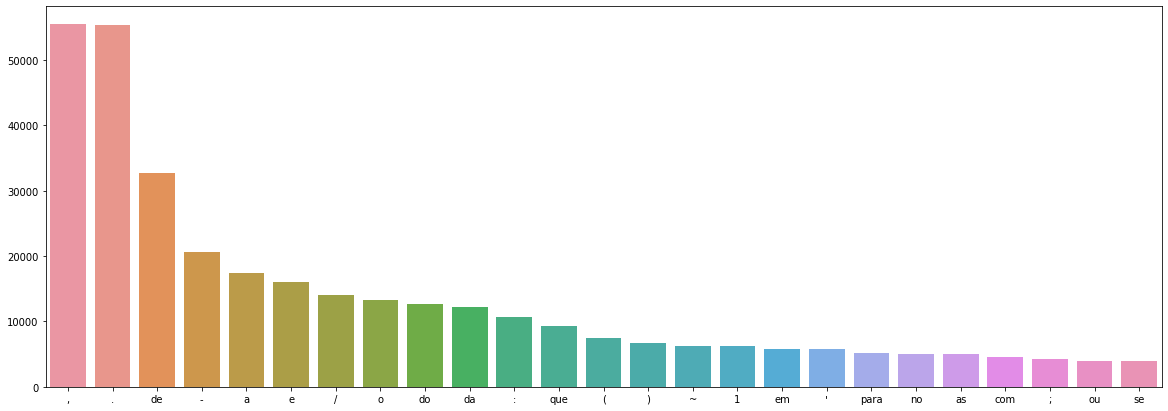

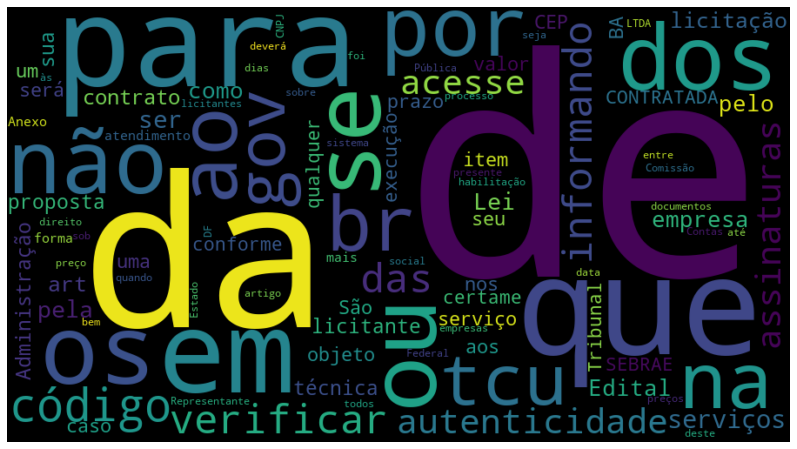

Entidades do tipo: PESSOA
de             271
.              172
Silva          157
da             155
Cunha          134
Dias           132
DE             119
Lima           108
Roberto        103
Albuquerque    101
Rabelo          89
Roseli          87
Coelho          86
Fernandes       81
Valentin        79
PEREIRA         78
&               70
Guilherme       65
Augusto         64
Sousa           63
Campos          60
L               59
Isabel          58
Cristina        57
Nogueira        57
dtype: int64


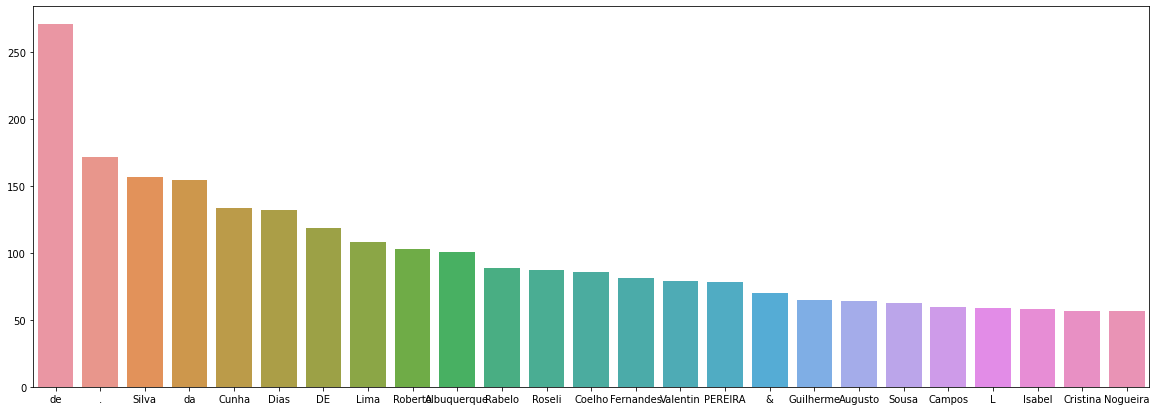

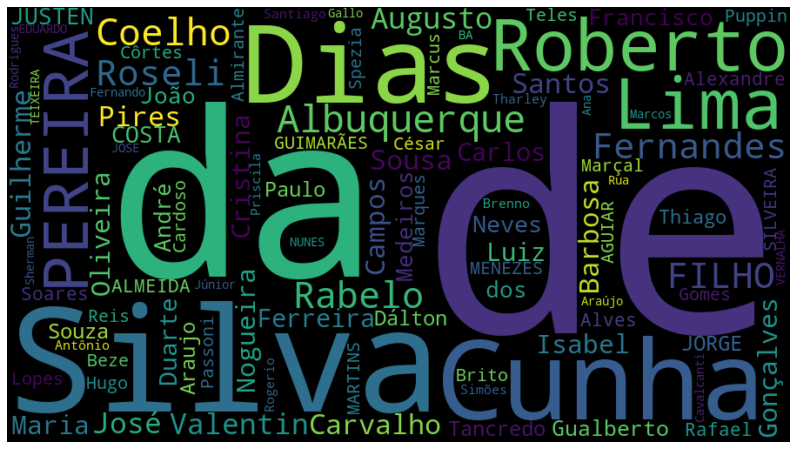

Entidades do tipo: TEMPO
/        2700
de       1192
2013      513
10        487
2015      472
12        453
.         431
07        356
11        343
-         198
2012      170
2014      165
2010      149
2011      137
09        137
03        124
20        121
1993      118
06        113
junho     103
31        102
01         98
08         97
30         97
05         94
dtype: int64


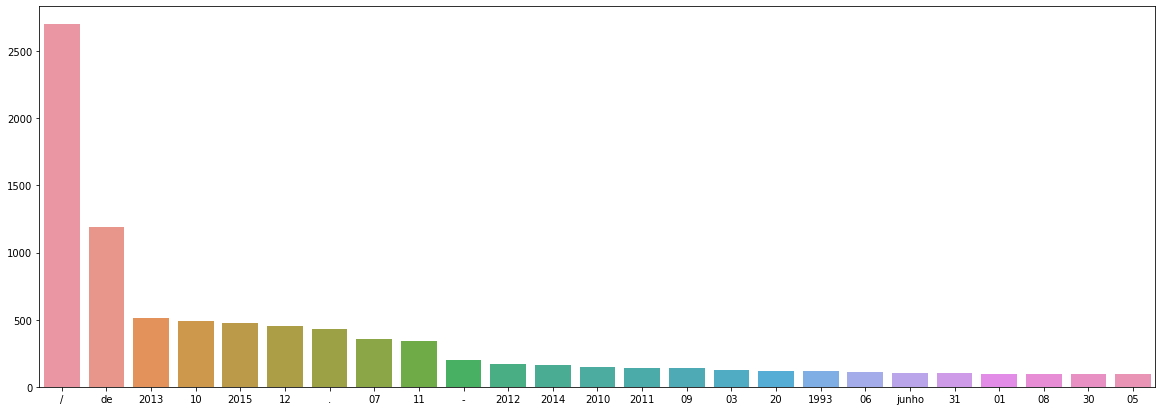

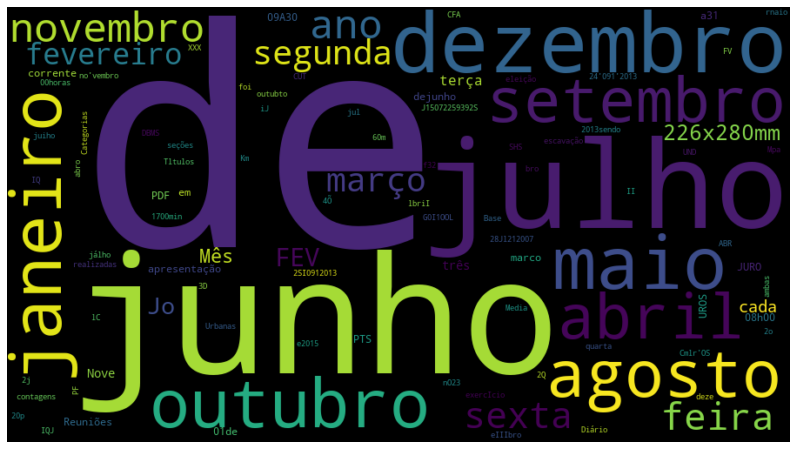

Entidades do tipo: LOCAL
-           647
Brasília    432
São         385
DF          379
/           367
de          299
Rua         289
Paulo       284
Porto       193
Rio         169
Bairro      165
BA          155
Curitiba    147
Brasil      141
do          131
PR          127
Janeiro     119
Londrina    118
SP          112
Alegre      105
.            96
Caetano      95
Bahia        93
RS           89
Itabuna      82
dtype: int64


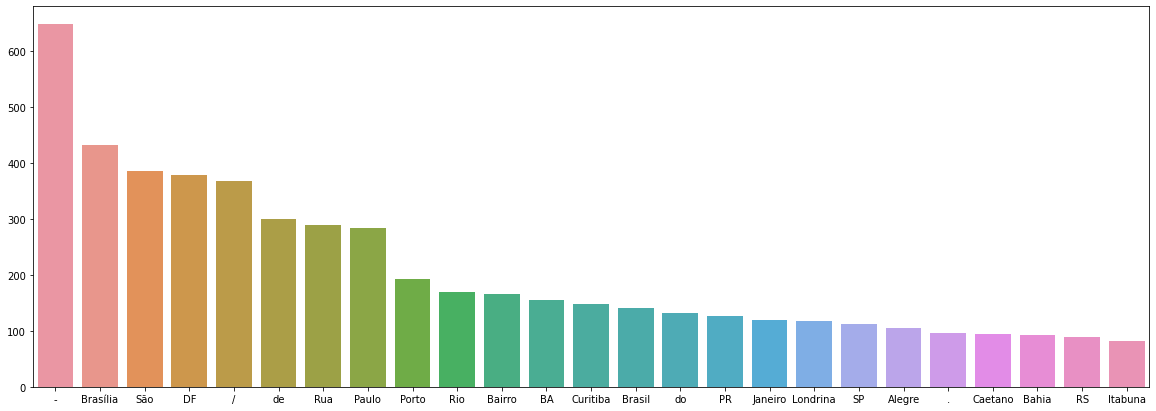

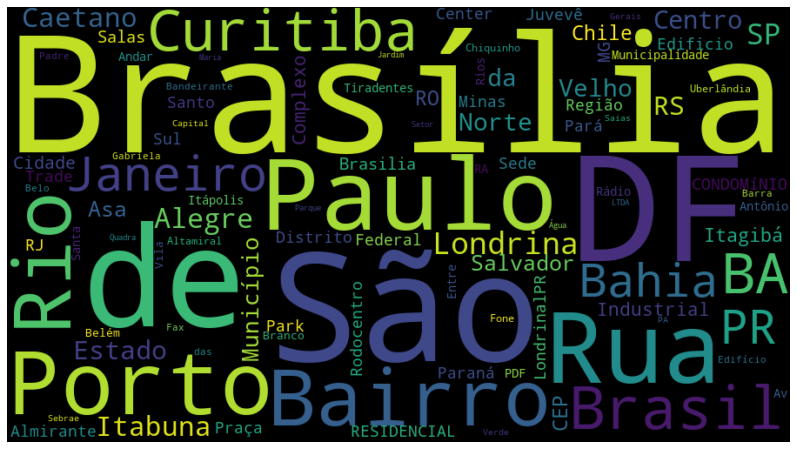

Entidades do tipo: ORGANIZACAO
de             1834
da              723
e               590
do              548
-               520
DE              476
LTDA            404
/               357
E               346
União           319
Ministério      305
Tribunal        296
DA              289
Secretaria      264
TCU             261
Plenário        246
Federal         232
Contas          217
DO              201
Estado          185
Geral           165
.               161
Agricultura     157
Serviços        155
ESTADO          145
dtype: int64


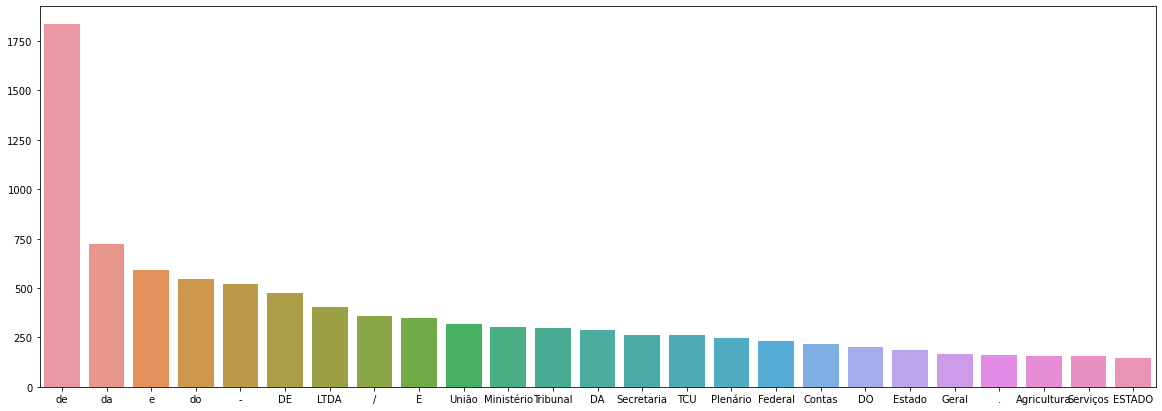

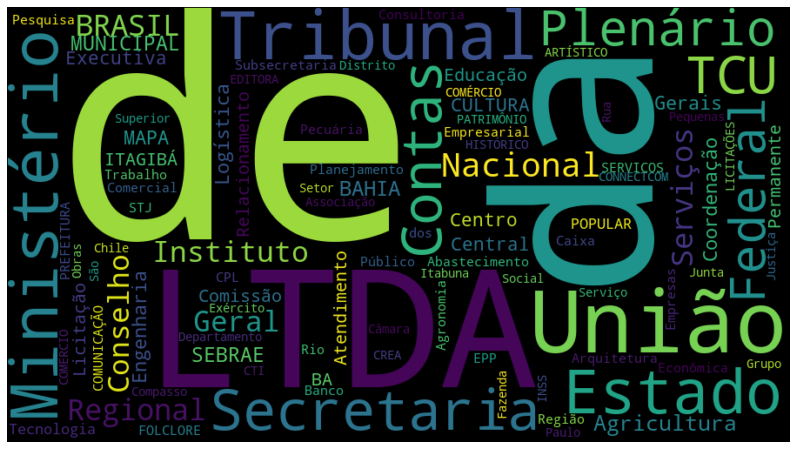

Entidades do tipo: JURISPRUDENCIA
/           591
.           437
-           294
Acórdão     215
1           122
°           115
2013        113
n           102
2009         66
TCU          57
2            56
Plenário     55
2010         49
Acórdãos     47
2011         43
2012         39
2007         38
2008         37
TC           35
,            33
214          33
N            31
nO           27
do           26
2006         26
dtype: int64


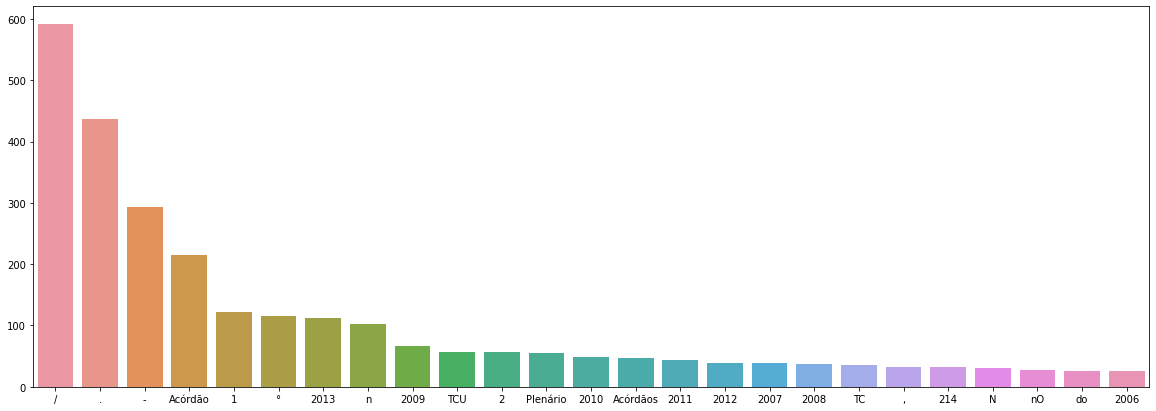

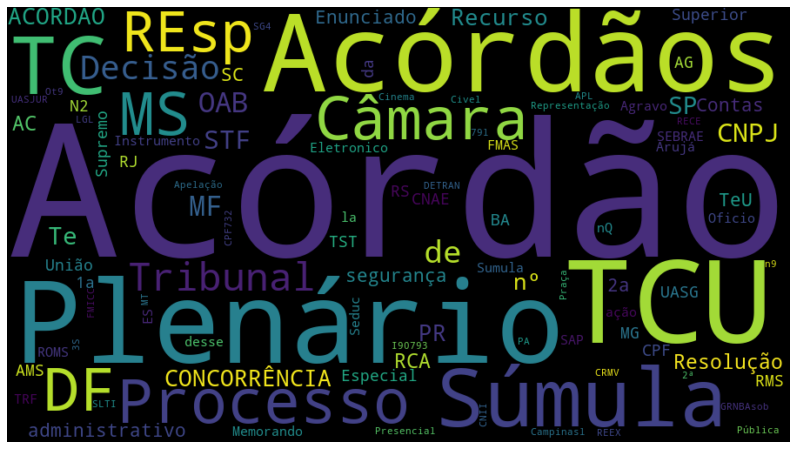

Entidades do tipo: LEGISLACAO
.          1682
/          1396
,          1313
Lei        1165
da         1033
°           985
8           725
n           719
do          677
666         590
93          415
de          357
artigo      330
e           239
Decreto     219
inciso      212
1           210
2           206
3           163
I           161
10          154
N           150
5           139
nO          128
Federal     125
dtype: int64


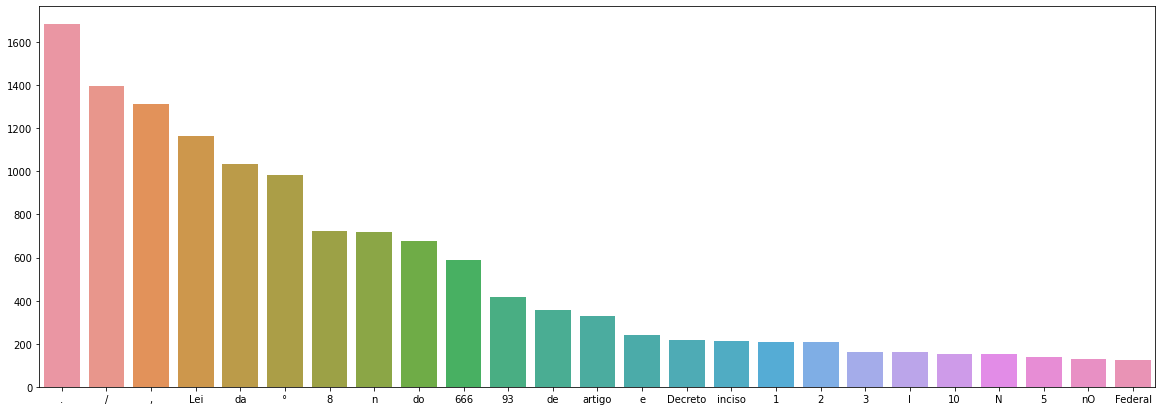

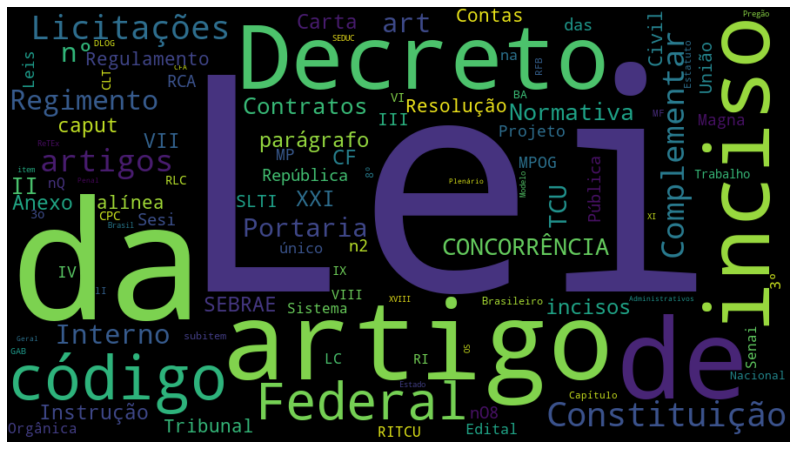

In [25]:
for column in df_sample.columns:
    print("Entidades do tipo: " + column)
    print(generate_freq_dist_plot(df_sample[column]))
    generate_wordcloud(df_sample[column])

### Storing entities found

In [42]:
"""  Let"s store the data """
excel_filename = RELATIVE_PATH_TO_FOLDER + DATA_FILENAME + "_treated.xlsx"

In [44]:
"""  Convert the dataframe to an xlsx file """
df_sample.to_excel(excel_filename)

print("Stored tread dataset on ", excel_filename)

ModuleNotFoundError: No module named 'openpyxl'